In [1]:
"""Data inspection."""

'Data inspection.'

In [3]:
import importlib
import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

import analyze
importlib.reload(analyze)
import datasets
importlib.reload(datasets)
import toylosses
importlib.reload(toylosses)
import vis
importlib.reload(vis)

import train_utils
importlib.reload(train_utils)

NEURO_DIR = '/neuro/'

IMG_SHAPE = (100, 100)
SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
DATASET_PATH = '/neuro/train_val_datasets/train_conn_%s.npy' % SHAPE_STR
#VAL_DATASET_PATH = '/neuro/train_val_datasets/val_conn_%s.npy' % SHAPE_STR

#DATASET_PATH = TRAIN_DATASET_PATH
#DATASET = np.load(DATASET_PATH)

OUTPUT = '/scratch/users/nmiolane/output_connectomes'
CMAP = 'Spectral'

From: https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf

1. netmats1: Using "full" normalized temporal correlation between every node timeseries
and every other. This is a common approach and is very simple, but it has various
practical and interpretational disadvantages [Smith 2012].
2. netmats2: Using partial temporal correlation between nodes' timeseries. This aims to
estimate direct connection strengths better than achieved by full correlation. To slightly
improve the estimates of partial correlation coefficients, a small amount of L2
regularization is applied (setting rho=0.01 in the Ridge Regression netmats option in
FSLNets) [Smith OHBM 2014, FSLNets]. 

dict_keys(['__header__', '__version__', '__globals__', 'TCS', 'TCSnf'])
(360, 1190)
(360, 1190)


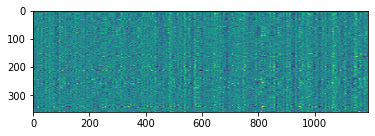

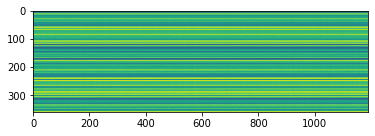

In [17]:
import scipy.io
mat = scipy.io.loadmat('/neuro/connectomes_raphael/Rest1LR_Sub100307_Glasser.mat')
print(mat.keys())
print(mat['TCS'].shape)
print(mat['TCSnf'].shape)
plt.figure()
plt.imshow(mat['TCS'])
plt.figure()
plt.imshow(mat['TCSnf'])

In [2]:
print(DATASET.shape)
print(np.min(DATASET))
print(np.max(DATASET))

(649, 1, 100, 100)
0.0
1.0


Loading /neuro/train_val_datasets/train_conn_100x100.npy
Dataset shape: (649, 1, 100, 100)


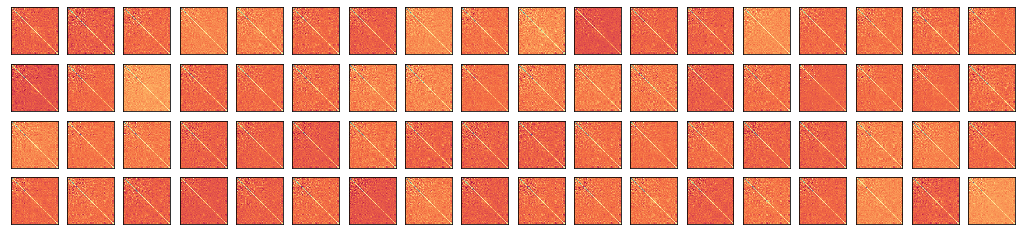

In [3]:
vis.show_data(DATASET_PATH, cmap=CMAP)

Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/outp

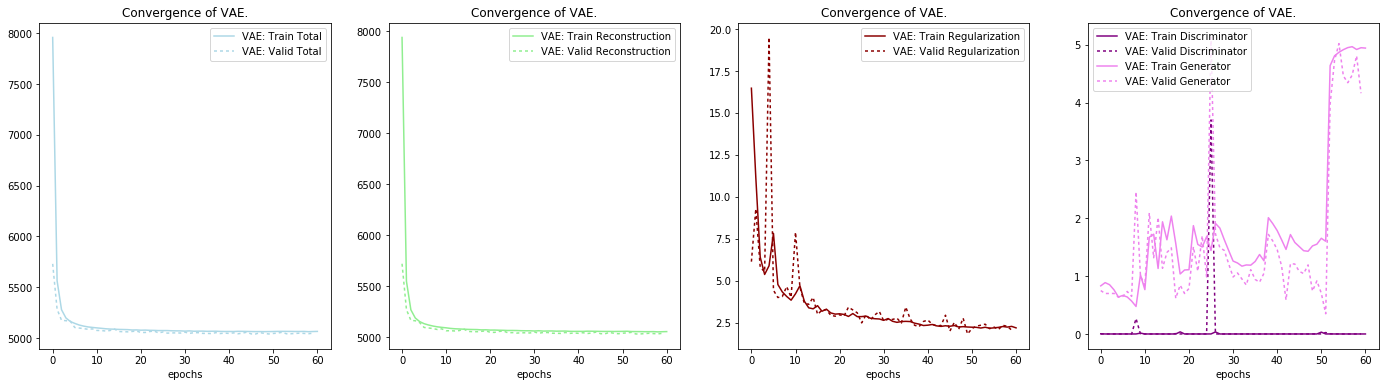

In [4]:
vis.plot_losses(output=OUTPUT)

Loading /neuro/train_val_datasets/train_conn_100x100.npy
Dataset shape: (649, 1, 100, 100)
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Loading encoder from network of architecture: gan...
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Loading decoder from network of architecture: gan...


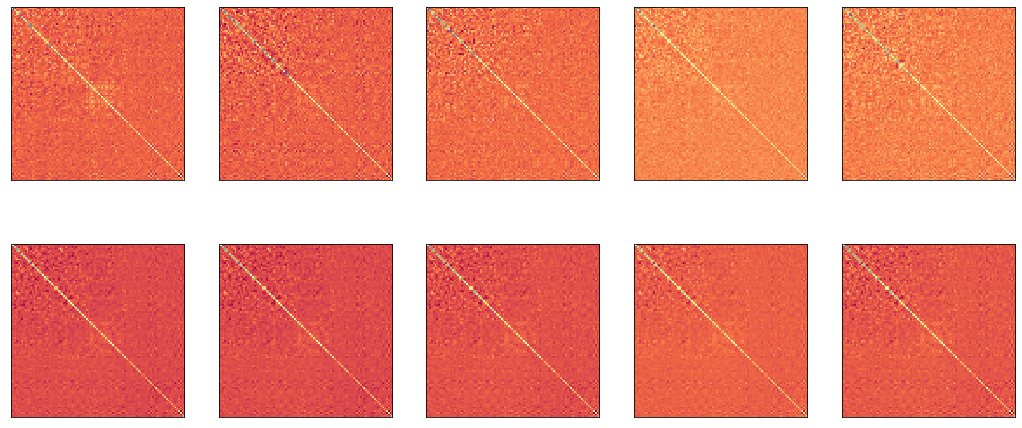

In [5]:
vis.show_img_and_recon(OUTPUT, DATASET_PATH, cmap=CMAP)

Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Loading decoder from network of architecture: gan...


/home/user/miniconda/envs/py36/lib/python3.7/site-packages/torch/tensor.py:339: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


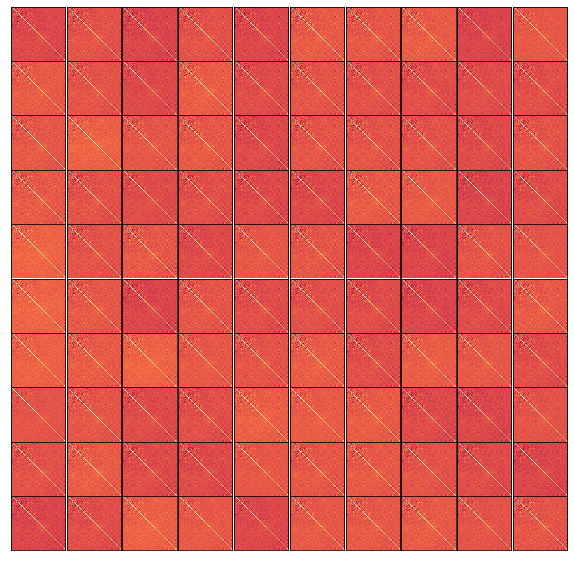

In [6]:
fig = plt.figure(figsize=(10, 10))
outer = gridspec.GridSpec(1, 1, wspace=0.1, hspace=0.1)

for i, algo_name in enumerate(['vae']):
    vis.show_samples_from_prior(
        OUTPUT, fig, outer, i, algo_name, cmap=CMAP)
fig.show()

Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.
Loading encoder from network of architecture: gan...


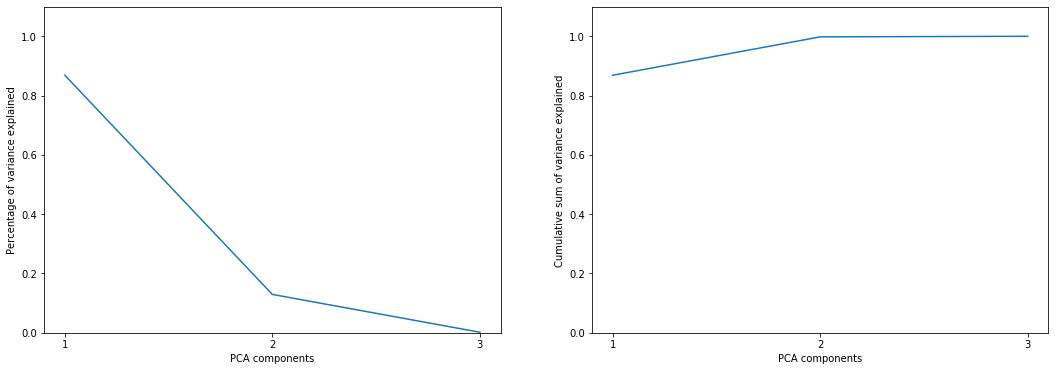

In [7]:
ax = vis.plot_variance_explained(OUTPUT, DATASET_PATH)

In [4]:
n_pcs = 2

mus = analyze.latent_projection(output=OUTPUT, dataset_path=DATASET_PATH)
_, projected_mus = analyze.pca_projection(mus, n_pcs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

for mu in projected_mus:
    if n_pcs == 2:
        im = ax.scatter(mu[0], mu[1]) 
    else:
        im = ax.scatter(mu[0], mu[1], mu[2])
ax.set('equal')

Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_60_checkpoint.pth.


FileNotFoundError: [Errno 2] No such file or directory: '/neuro/train_val_datasets/train_conn_100x100.npy'